#**Multi Class Classification**
~~ Avni Bansal

Weather dataset having 4 classes -> Cloudy, Rain, Shine, Sunrise.

**STRUCTURE in my drive is as follows:**

*Weather* folder has *Train* and *Test* folders. *Train* folder contains the 4 classes. *Test* folder has 4 images fron each class.


**My Vision:** Live updates of weather in america will ensure safety from natural disasters like tornados, extreme heat, flames/smoke from nearby forest fires and likewise. Basic tool for that will be image classification of various weather conditions.


**Colab link -** [https://colab.research.google.com/drive/1xId02cpJ8NJJDhmqBsiNuc5OZIiApnhT#scrollTo=2rGH9W60FOED](https://)



**Dataset link:** [https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset](https://)

---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_path = '/content/drive/MyDrive/Dataset/Weather/Train'

valid_path = '/content/drive/MyDrive/Dataset/Weather/Validation'

test_path =  '/content/drive/MyDrive/Dataset/Weather/Test'

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=50,shuffle = True)

valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=10,shuffle = True)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=10,shuffle=False)

Found 1065 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [5]:
imgs,labels=next(train_batches)

In [6]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

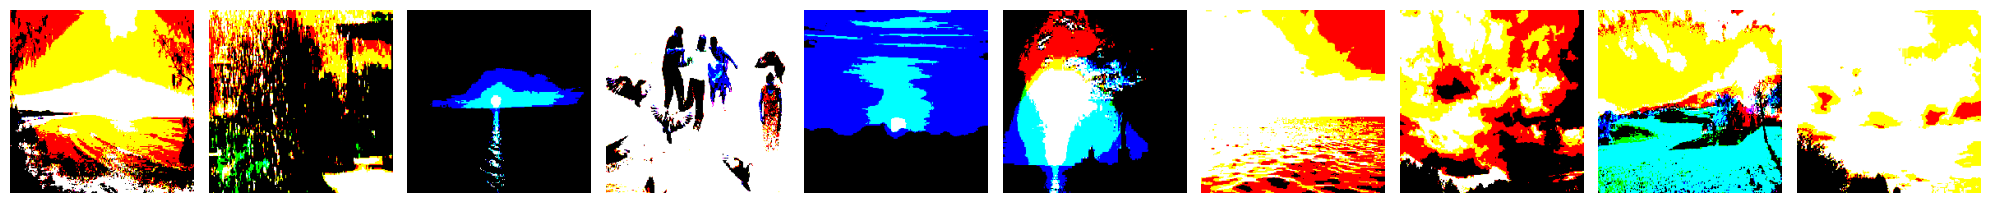

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [7]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

In [9]:
model=Sequential([
                  Conv2D(filters=16,kernel_size=(3,3),activation='tanh',padding='same',input_shape=(224,224,3)), #param=(3*3*3+1)*16
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*16+1)*32
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=32,activation='softmax'), #param=size of flatten*4+4
                  Dense(units=4,activation='softmax'), #param=size of flatten*4+4
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 32)                3

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(x=train_batches,validation_data = valid_batches,epochs=10,verbose=1)

Epoch 1/10
22/22 [==============================] - 9s 415ms/step - loss: 0.5919 - accuracy: 0.7793 - val_loss: 0.5941 - val_accuracy: 0.7000
Epoch 2/10
22/22 [==============================] - 9s 429ms/step - loss: 0.5905 - accuracy: 0.7803 - val_loss: 0.5939 - val_accuracy: 0.7250
Epoch 3/10
22/22 [==============================] - 9s 414ms/step - loss: 0.5888 - accuracy: 0.7793 - val_loss: 0.5903 - val_accuracy: 0.7250
Epoch 4/10
22/22 [==============================] - 9s 392ms/step - loss: 0.5872 - accuracy: 0.7765 - val_loss: 0.5907 - val_accuracy: 0.7250
Epoch 5/10
22/22 [==============================] - 8s 362ms/step - loss: 0.5858 - accuracy: 0.7793 - val_loss: 0.5896 - val_accuracy: 0.7250
Epoch 6/10
22/22 [==============================] - 9s 394ms/step - loss: 0.5844 - accuracy: 0.7822 - val_loss: 0.5894 - val_accuracy: 0.7000
Epoch 7/10
22/22 [==============================] - 9s 395ms/step - loss: 0.5832 - accuracy: 0.8225 - val_loss: 0.5928 - val_accuracy: 0.8500
Epoch 

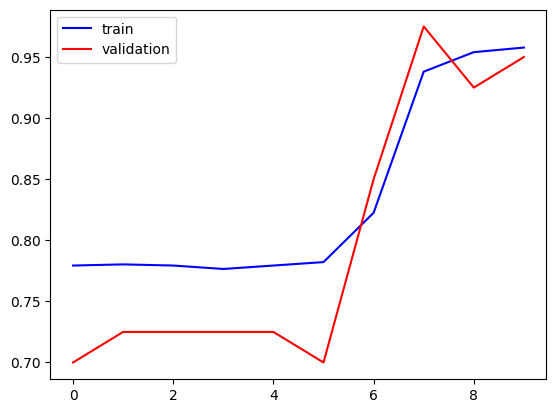

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

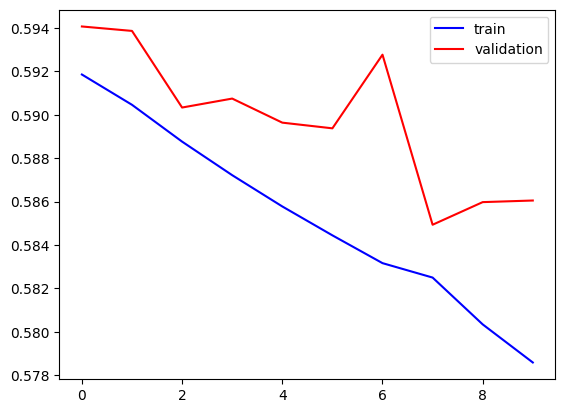

In [18]:

plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='red',label='validation')
plt.legend()
plt.show()

In [23]:
#predictions=model.predict(test_img)
predictions=model.predict(x=test_batches,verbose="auto")

2/2 [==============================] - 3s 3s/step


In [24]:
predictions

array([[0.36083934, 0.22716074, 0.19642912, 0.21557084],
       [0.3610648 , 0.22714975, 0.1962408 , 0.21554461],
       [0.3610648 , 0.22714975, 0.1962408 , 0.21554461],
       [0.35984334, 0.22753549, 0.19684504, 0.21577612],
       [0.23491094, 0.21607237, 0.33303583, 0.21598087],
       [0.24090576, 0.26467645, 0.26080042, 0.2336174 ],
       [0.24090433, 0.26465067, 0.26083508, 0.23360988],
       [0.24111709, 0.2646135 , 0.26067317, 0.23359624],
       [0.24089333, 0.26468524, 0.26075116, 0.23367026],
       [0.24090575, 0.26467645, 0.26080042, 0.23361738],
       [0.23490536, 0.21606942, 0.3330457 , 0.21597947],
       [0.23490633, 0.21607178, 0.3330414 , 0.21598054],
       [0.23521066, 0.21613479, 0.3326394 , 0.21601515],
       [0.21368878, 0.27107278, 0.18330722, 0.3319312 ],
       [0.23492207, 0.21607508, 0.33302057, 0.2159823 ],
       [0.21368907, 0.27107343, 0.18330632, 0.3319312 ],
       [0.2136886 , 0.2710723 , 0.18330789, 0.3319312 ],
       [0.2136895 , 0.27107343,

In [25]:
for [a,b,c,d] in predictions:
  ans = max(max(a,b),max(c,d))
  if(ans==a):
    print('Cloudy')
  elif(ans==b):
    print('Rain')
  elif(ans==c):
    print('Shine')
  elif(ans==d):
    print('Sunrise')



Cloudy
Cloudy
Cloudy
Cloudy
Shine
Rain
Rain
Rain
Rain
Rain
Shine
Shine
Shine
Sunrise
Shine
Sunrise
Sunrise
Sunrise
Sunrise
Sunrise


In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [28]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max()-cm.min() / 2 + cm.min()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[4 0 1 0]
 [0 5 0 0]
 [0 0 4 1]
 [0 0 0 5]]


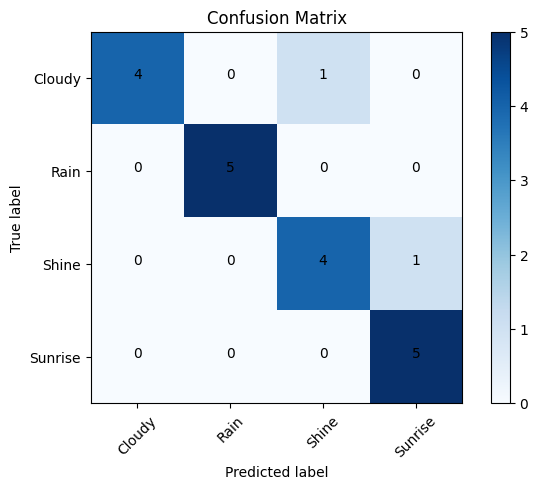

In [29]:
cm_plot_labels=['Cloudy','Rain','Shine','Sunrise']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')